In [1]:
import pandas as pd
import sqlite3
import requests
import numpy as np
import folium
import folium.plugins 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
con = sqlite3.connect('Campsite_data.db')
query = ''' SELECT * FROM Venues'''
completed_venues = pd.read_sql_query(query,con).drop('index',axis=1)
query = ''' SELECT Campsite_Name, Latitude, Longitude FROM Sites WHERE Campsite_Name like '%RV%' AND Campsite_Name not like '%closed%'   '''
df_RV = pd.read_sql_query(query,con).drop_duplicates()
con.close()
Camp_sites_onehot = pd.get_dummies(completed_venues[['Venue_Category']], prefix="", prefix_sep="")
Camp_sites_onehot['Latitude'] = completed_venues['Latitude']
Camp_sites_onehot = Camp_sites_onehot[[Camp_sites_onehot.columns[-1]] + list(Camp_sites_onehot.columns[:-1])]
campsite_grouped = Camp_sites_onehot.groupby('Latitude').mean().reset_index()
campsite_grouped_clustering = campsite_grouped.drop('Latitude', 1)
campsite_grouped

,Latitude,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,22.901054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22.905953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.686356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.701440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.150010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,64.832576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5275,64.835300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5276,64.839585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5277,64.962006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_RV

,Campsite_Name,Latitude,Longitude
0,10 Acres Campground and RV Park,44.030277,-73.403468
1,1015 RV Park,26.145834,-97.958195
2,11 Bridges Campground and RV Park,51.415188,-112.632344
3,115 Creek Rest Area (no services),58.716979,-124.912576
4,1202 Motor Inn and RV Park,62.387044,-140.873463
...,...,...,...
5306,Zion RV and Campground,37.236637,-112.856060
5307,Zion West RV Park,37.231969,-113.364556
5308,Zion's Gate RV Resort,37.170192,-113.373832
5309,Zuni Village RV Park,35.224768,-114.014515


In [4]:
result_ss = []


range_for_test = list(range(1,12))

# run k-means clustering
for k in range_for_test:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(campsite_grouped_clustering)
    result_ss.append(kmeans.inertia_)

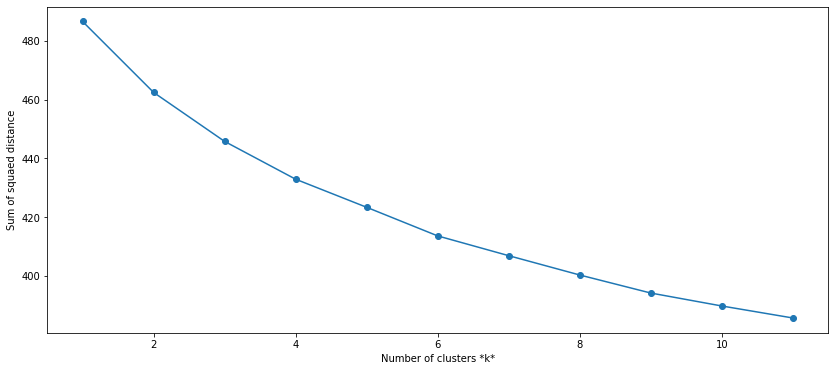

In [5]:
plt.figure(figsize=(14,6))
plt.plot(range_for_test,result_ss, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squaed distance')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(campsite_grouped_clustering)

In [13]:
kmeans.labels_[0:30]

array([4, 4, 1, 1, 4, 1, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 1, 1, 4, 4,
       4, 4, 2, 2, 4, 4, 4, 4], dtype=int32)

In [7]:
campsite_grouped.insert(0, 'Kmeans_Cluster_Labels', kmeans.labels_)
df_RV = df_RV.reset_index().set_index('Latitude')
campsite_grouped = campsite_grouped.set_index('Latitude')

In [8]:
df_RV['Kmeans_Cluster_Labels'] = campsite_grouped['Kmeans_Cluster_Labels']
df_RV = df_RV.reset_index()
df_RV

,Latitude,index,Campsite_Name,Longitude,Kmeans_Cluster_Labels
0,44.030277,0,10 Acres Campground and RV Park,-73.403468,2.0
1,26.145834,1,1015 RV Park,-97.958195,4.0
2,51.415188,2,11 Bridges Campground and RV Park,-112.632344,3.0
3,58.716979,3,115 Creek Rest Area (no services),-124.912576,NaN
4,62.387044,4,1202 Motor Inn and RV Park,-140.873463,1.0
...,...,...,...,...,...
5306,37.236637,5306,Zion RV and Campground,-112.856060,2.0
5307,37.231969,5307,Zion West RV Park,-113.364556,3.0
5308,37.170192,5308,Zion's Gate RV Resort,-113.373832,3.0
5309,35.224768,5309,Zuni Village RV Park,-114.014515,4.0


In [9]:
df_RV.groupby('Kmeans_Cluster_Labels').count()

,Latitude,index,Campsite_Name,Longitude
Kmeans_Cluster_Labels,,,,
0.0,151,151,151,151
1.0,342,342,342,342
2.0,1112,1112,1112,1112
3.0,1257,1257,1257,1257
4.0,2349,2349,2349,2349
5.0,73,73,73,73


In [10]:
# create map of RV parks using latitude and longitude values
latitude = df_RV['Latitude'].mean()
longitude = df_RV['Longitude'].mean()
map_national_RV_parks_clusters = {}
for cluster in df_RV.groupby('Kmeans_Cluster_Labels').count().reset_index()['Kmeans_Cluster_Labels'].tolist():
    
    map_national_RV_parks_clusters[cluster] = folium.Map(location=[latitude, longitude], zoom_start=4)

    # add markers to map
    marker_cluster_clusters = {}
    marker_cluster_clusters[cluster] = folium.plugins.MarkerCluster().add_to(map_national_RV_parks_clusters[cluster])
    for lat, lng, name in zip(df_RV[df_RV['Kmeans_Cluster_Labels']==cluster]['Latitude'], df_RV[df_RV['Kmeans_Cluster_Labels']==cluster]['Longitude'], df_RV.reset_index()[df_RV['Kmeans_Cluster_Labels']==cluster]['Campsite_Name']):
        label = "<a  target='_blank' href='https://www.google.com/search?q={}'>{}</a>".format(name.replace(' ','%20'),name)
        #label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(marker_cluster_clusters[cluster])  

    map_national_RV_parks_clusters[cluster].save('Kmeans/Cluster {} from analysis.html'.format(cluster))

In [11]:
df_RV = df_RV.drop('index',axis=1)
df_RV

,Latitude,Campsite_Name,Longitude,Kmeans_Cluster_Labels
0,44.030277,10 Acres Campground and RV Park,-73.403468,2.0
1,26.145834,1015 RV Park,-97.958195,4.0
2,51.415188,11 Bridges Campground and RV Park,-112.632344,3.0
3,58.716979,115 Creek Rest Area (no services),-124.912576,NaN
4,62.387044,1202 Motor Inn and RV Park,-140.873463,1.0
...,...,...,...,...
5306,37.236637,Zion RV and Campground,-112.856060,2.0
5307,37.231969,Zion West RV Park,-113.364556,3.0
5308,37.170192,Zion's Gate RV Resort,-113.373832,3.0
5309,35.224768,Zuni Village RV Park,-114.014515,4.0


In [22]:
con = sqlite3.connect('Campsite_data.db')
df_RV.to_sql('Kmeans',con,if_exists='replace')
campsite_grouped['']
campsite_grouped.reset_index().to_sql('Kmeans_grouped',con,if_exists='replace')
con.close()

/home/theia/.local/lib/python3.6/site-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


## Let's make sure we can read the data

In [41]:
con = sqlite3.connect('Campsite_data.db')
query = ''' SELECT * FROM Kmeans'''
df_RV_Kmeans = pd.read_sql_query(query,con).drop('index',axis=1)
query = ''' SELECT * FROM Kmeans_grouped'''
df_RV_Kmeans_grouped = pd.read_sql_query(query,con).drop('index',axis=1)
con.close()

In [42]:
df_RV_Kmeans

,Latitude,Campsite_Name,Longitude,Kmeans_Cluster_Labels
0,44.030277,10 Acres Campground and RV Park,-73.403468,2.0
1,26.145834,1015 RV Park,-97.958195,4.0
2,51.415188,11 Bridges Campground and RV Park,-112.632344,3.0
3,58.716979,115 Creek Rest Area (no services),-124.912576,NaN
4,62.387044,1202 Motor Inn and RV Park,-140.873463,1.0
...,...,...,...,...
5306,37.236637,Zion RV and Campground,-112.856060,2.0
5307,37.231969,Zion West RV Park,-113.364556,3.0
5308,37.170192,Zion's Gate RV Resort,-113.373832,3.0
5309,35.224768,Zuni Village RV Park,-114.014515,4.0


## I will now seperate the dataFrame into seperate frames

In [80]:
df_Kmeans = {}
df_Kmeans_grouped = {}
df_Kmeans_stats = {}
for cluster in df_RV_Kmeans.groupby('Kmeans_Cluster_Labels').count().reset_index()['Kmeans_Cluster_Labels'].tolist():
    df_Kmeans[cluster] = df_RV_Kmeans[df_RV_Kmeans['Kmeans_Cluster_Labels'] == cluster]
    df_Kmeans_grouped[cluster] = df_RV_Kmeans_grouped[df_RV_Kmeans_grouped['Kmeans_Cluster_Labels'] == cluster]
    cols = (df_Kmeans_grouped[cluster] != 0).any()
    try:
        df_Kmeans_grouped[cluster] = df_Kmeans_grouped[cluster][cols[cols].index]
        df_Kmeans_stats[cluster] = df_Kmeans_grouped[cluster].drop(['Kmeans_Cluster_Labels','Latitude'],1).describe().T.sort_values(by='mean', ascending=False)
    except:
        pass
        #df_Kmeans_stats[cluster] = df_Kmeans_grouped[cluster].drop(['Kmeans_Cluster_Labels','Latitude'],1).describe().T.sort_values(by='mean', ascending=False)
    print("Cluster number: {}, cluster size: {}, number of venue types: {}".format(cluster, df_Kmeans_grouped[cluster].shape[0], df_Kmeans_grouped[cluster].shape[1]-1))

Cluster number: 0.0, cluster size: 151, number of venue types: 122
Cluster number: 1.0, cluster size: 342, number of venue types: 292
Cluster number: 2.0, cluster size: 1111, number of venue types: 403
Cluster number: 3.0, cluster size: 1256, number of venue types: 407
Cluster number: 4.0, cluster size: 2346, number of venue types: 564
Cluster number: 5.0, cluster size: 73, number of venue types: 73


In [68]:
df_Kmeans[1]

,Latitude,Campsite_Name,Longitude,Kmeans_Cluster_Labels
4,62.387044,1202 Motor Inn and RV Park,-140.873463,1.0
44,38.988243,A-OK RV Park,-110.153850,1.0
90,37.364348,Alamo RV Park,-115.161967,1.0
118,35.375798,Almond's Boat and RV Park,-83.562891,1.0
122,45.082517,Alpena Army Training Center - Alpena RV Park [...,-83.573599,1.0
...,...,...,...,...
5285,45.038793,Yellowstone RV Park,-110.723981,1.0
5287,44.475066,Yellowstone Valley Inn and RV Park,-109.411554,1.0
5293,37.825201,Yosemite Pines RV Resort,-120.195161,1.0
5303,28.451591,Zertuche RV Park,-99.247018,1.0


In [81]:
for i in df_Kmeans_stats:
    print("Group: {}, DF: {}".format(i,df_Kmeans_stats[i]))

Group: 1.0, DF:                      count      mean       std  min       25%       50%  \
Hotel                342.0  0.188589  0.114143  0.0  0.133333  0.157895   
American Restaurant  342.0  0.057959  0.072372  0.0  0.000000  0.033333   
Gas Station          342.0  0.039973  0.063114  0.0  0.000000  0.000000   
Motel                342.0  0.028859  0.071745  0.0  0.000000  0.000000   
Mexican Restaurant   342.0  0.026752  0.042861  0.0  0.000000  0.000000   
...                    ...       ...       ...  ...       ...       ...   
Massage Studio       342.0  0.000049  0.000901  0.0  0.000000  0.000000   
Tiki Bar             342.0  0.000049  0.000901  0.0  0.000000  0.000000   
Theme Restaurant     342.0  0.000049  0.000901  0.0  0.000000  0.000000   
Smoke Shop           342.0  0.000049  0.000901  0.0  0.000000  0.000000   
ATM                  342.0  0.000049  0.000901  0.0  0.000000  0.000000   

                          75%       max  
Hotel                0.206250  1.000000  

In [75]:
df_Kmeans_stats[0]

KeyError: 0

In [73]:
list(df_Kmeans_grouped[2].columns)

['Latitude',
 'Kmeans_Cluster_Labels',
 'ATM',
 'Accessories Store',
 'Adult Boutique',
 'Advertising Agency',
 'African Restaurant',
 'Airport',
 'Airport Service',
 'Airport Terminal',
 'American Restaurant',
 'Amphitheater',
 'Andhra Restaurant',
 'Animal Shelter',
 'Antique Shop',
 'Apres Ski Bar',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Court',
 'Basketball Stadium',
 'Bay',
 'Beach',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat Launch',
 'Boat Rental',
 'Boat or Ferry',
 'Bookstore',
 'Border Crossing',
 'Boutique',
 'Bowling Alley',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 